# Лабораторна робота №2

Виконав студент 3 курсу
групи КА-02
Шинкарьов О.О.

Перевірила Недашківська Н.І.

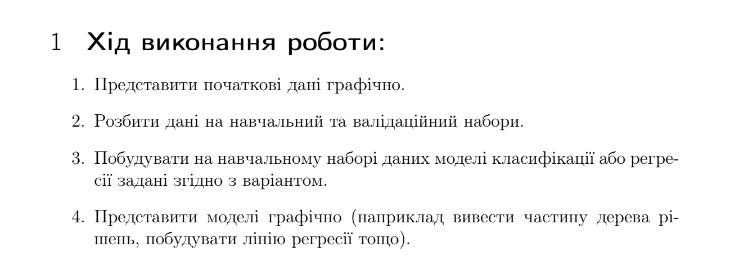

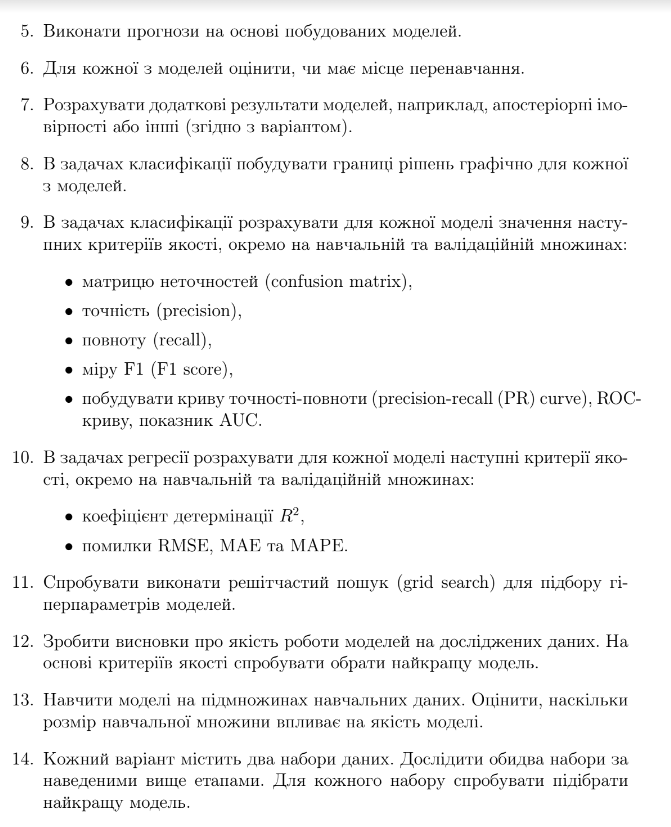

## Варіант 1

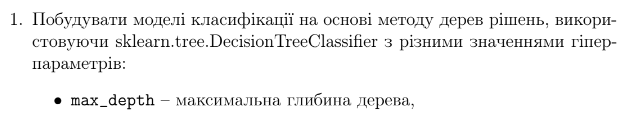

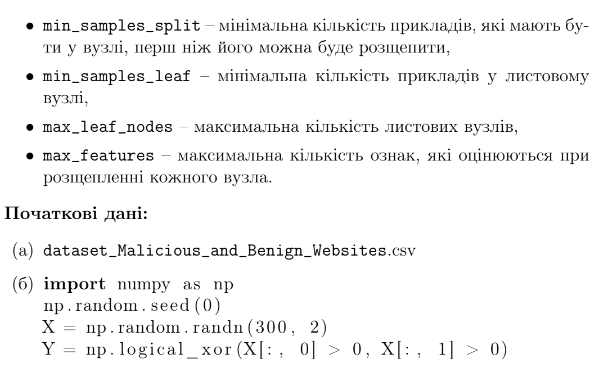

In [1]:
#завантаження необхідних для роботи бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%precision 2
np.set_printoptions(suppress=True)

In [2]:
#завантаження датасету
data = pd.read_csv(r'C:\Users\shink\Downloads\dataset_Malicious_and_Benign_Websites.csv')

In [3]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
data.shape

(1781, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

## Передобробка даних

In [6]:
#переведення назв колонок в нижній регістр
data.columns = data.columns.map(lambda x: x.lower())

In [7]:
data.content_length.value_counts()

324.0      138
1819.0      20
2516.0      13
162.0       12
345.0       11
          ... 
226.0        1
217.0        1
4695.0       1
636.0        1
24435.0      1
Name: content_length, Length: 637, dtype: int64

In [8]:
#заповнення невідомих значень content_length медіанним значенням
data.content_length = data.content_length.fillna(data.content_length.median())

In [9]:
#дропаємо 2 строчки з пустими даними
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        1779 non-null   object 
 1   url_length                 1779 non-null   int64  
 2   number_special_characters  1779 non-null   int64  
 3   charset                    1779 non-null   object 
 4   server                     1779 non-null   object 
 5   content_length             1779 non-null   float64
 6   whois_country              1779 non-null   object 
 7   whois_statepro             1779 non-null   object 
 8   whois_regdate              1779 non-null   object 
 9   whois_updated_date         1779 non-null   object 
 10  tcp_conversation_exchange  1779 non-null   int64  
 11  dist_remote_tcp_port       1779 non-null   int64  
 12  remote_ips                 1779 non-null   int64  
 13  app_bytes                  1779 non-null   int64

In [11]:
data.whois_country.value_counts()

US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
CN                  10
IN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
PH                   4
BS                   4
AT                   4
KY                   3
SE                   3
BE                   3
SC                   3
TR                   3
DE                   3
HK                   3
us                   3
IL                   2
SI                   2
UY                   2
Cyprus               2
RU                   2
UA                   2
KG                   2
BR                   2
NO                   2
LU                   1
LV                   1
United Kingdom       1
PK                   1
IT                   1
TH         

Бачимо, що деякі країни записані і в нижньому, і у верхньому регістрі, поєднаємо однакові країни, також в окремий клас "others" винесемо всі країни, представників яких < 35

In [12]:
cond_uk = (data.whois_country == "[u'GB'; u'UK']") |  (data.whois_country == 'UK') | (data.whois_country == 'United Kingdom')

In [13]:
data.whois_country.loc[cond_uk] = 'GB'

In [14]:
data.whois_country = data.whois_country.map(lambda x: x.upper())

In [15]:
top_countries = data.whois_country.value_counts()[:6].keys().to_list()
data.whois_country = data.whois_country.apply(lambda x: x if x in top_countries else 'other')

In [16]:
data.whois_country.value_counts()

US       1105
NONE      306
other     152
CA         83
ES         63
GB         35
AU         35
Name: whois_country, dtype: int64

Аналогічну роботу проробимо з фічами 'server', 'url', 'charset'

In [17]:
data.server.value_counts()[:20]

Apache                                                                                       385
nginx                                                                                        211
None                                                                                         175
Microsoft-HTTPAPI/2.0                                                                        113
cloudflare-nginx                                                                              94
Microsoft-IIS/7.5                                                                             51
Server                                                                                        49
GSE                                                                                           49
YouTubeFrontEnd                                                                               42
nginx/1.12.0                                                                                  36
ATS                           

Аналогічну роботу проробимо з фічами 'server', 'url', 'charset', 'whoisstatepro'

In [18]:
data.server.loc[data['server'].apply(lambda x: "apache" in str(x).lower())] = 'Apache'
data.server.loc[data['server'].apply(lambda x: "nginx" in str(x).lower())] = 'nginx'
data.server.loc[data['server'].apply(lambda x: "microsoft" in str(x).lower())] = 'microsoft'

C:\Users\shink\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
top_services = data.server.value_counts()[:4].keys().to_list()
data.server = data.server.apply(lambda x: x if x in top_services else 'other')

In [20]:
data.server.value_counts()

Apache       642
nginx        436
other        328
microsoft    198
None         175
Name: server, dtype: int64

In [21]:
data.url.value_counts()

M0_109     1
B0_87      1
B0_2108    1
B0_2053    1
B0_2035    1
          ..
M1_3       1
M0_53      1
M0_50      1
M0_48      1
B0_676     1
Name: url, Length: 1779, dtype: int64

In [22]:
data.url.loc[data['url'].apply(lambda x: "M" in str(x))] = 'M_url'
data.url.loc[data['url'].apply(lambda x: "B" in str(x))] = 'B_url'

In [23]:
data.url.value_counts()

B_url    1563
M_url     216
Name: url, dtype: int64

In [24]:
data.charset.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: charset, dtype: int64

In [25]:
data.charset.loc[data['charset'].apply(lambda x: "utf" in str(x).lower())] = 'utf'
data.charset.loc[data['charset'].apply(lambda x: "iso" in str(x).lower())] = 'iso'
data.charset.loc[data['charset'].apply(lambda x: "windows" in str(x).lower())] = 'windows'

In [26]:
data.charset.value_counts()

utf         1053
iso          562
us-ascii     155
None           7
windows        2
Name: charset, dtype: int64

In [27]:
data.whois_statepro.value_counts()[:20]

CA            372
None          362
NY             75
WA             65
Barcelona      62
FL             61
Arizona        58
California     57
ON             44
NV             30
UT             29
CO             24
PA             23
MA             22
IL             19
PANAMA         19
NJ             15
MO             15
Ohio           15
Queensland     14
Name: whois_statepro, dtype: int64

In [28]:
data.whois_statepro.loc[(data.whois_statepro == "California")] = 'CA'
top_regions = data.whois_statepro.value_counts()[:8].keys().to_list()
data.whois_statepro = data.whois_statepro.apply(lambda x: x if x in top_regions else 'other')

Перейдемо до обробки дат. Тут ми вилучаємо усі об'єкти, що не схожі на дату, а потім присваємо їм медіанне значення "whois_regdate" і "whois_updated_date". Потім перетворюємо ці дані в цілий тип, взявши за нуль мінімальні значення "whois_regdate" і "whois_updated_date" відповідно, а за крок 1 день

In [29]:
data.whois_regdate.unique()

array(['10/10/2015 18:21', 'None', '7/10/1997 4:00', '12/05/1996 0:00',
       '3/08/2016 14:30', '29/07/2002 0:00', '18/03/1997 0:00',
       '8/11/2014 7:41', '14/09/2007 0:00', '22/11/2016 0:00',
       '11/10/2002 0:00', '14/11/2002 0:00', '16/07/2000 0:00',
       '25/05/2013 0:00', '9/08/1999 0:00', '15/09/2013 0:00',
       '3/07/1999 0:00', '2/11/2003 0:00', '12/08/2008 22:10',
       '21/05/2009 0:00', '1/08/2002 0:00', '13/01/2005 0:00',
       '18/05/2005 19:41', '4/01/2001 0:00', '28/02/2008 10:58',
       '8/12/2006 0:00', '16/06/2000 0:00', '13/10/2000 0:00',
       '31/12/1999 0:00', '30/07/1996 0:00', '9/05/2008 0:00',
       '23/04/1999 0:00', '4/02/1997 0:00', '13/02/2003 0:00',
       '17/05/2008 0:00', '30/05/2002 0:00', '20/10/2005 0:00',
       '7/01/2006 0:00', '5/03/1996 5:00', '23/03/1995 0:00',
       '10/01/1998 0:00', '27/04/2016 0:00', '7/04/2011 0:00',
       '26/02/2009 0:00', '3/07/2002 0:00', '21/02/1995 0:00',
       '4/07/2007 0:00', '2/07/1998 0:00',

In [30]:
data.whois_regdate.loc[data.whois_regdate == '2002-03-20T23:59:59.0Z'] = '21/03/2002 0:00'
data.whois_regdate.loc[data.whois_regdate == 'b'] = 'None'
data.whois_regdate.loc[data.whois_regdate == '0'] = 'None'

In [31]:
cond_reg = data.whois_regdate == 'None'
reg_date_median = pd.to_datetime(data.whois_regdate.loc[~cond_reg], infer_datetime_format=False).median()

In [32]:
data.whois_regdate.loc[cond_reg] = reg_date_median

C:\Users\shink\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
data.whois_regdate = pd.to_datetime(data.whois_regdate)
data.whois_regdate = (data.whois_regdate.max() - data.whois_regdate).apply(lambda x: x.days)

data.rename(columns = {
    'whois_regdate' : 'lifetime'
}, inplace = True)

In [34]:
data.whois_updated_date.unique()

array(['None', '12/09/2013 0:45', '11/04/2017 0:00', '3/10/2016 3:45',
       '1/07/2016 0:00', '19/03/2017 0:00', '9/09/2015 0:00',
       '23/11/2016 0:00', '6/10/2016 0:00', '19/04/2015 0:00',
       '4/07/2015 0:00', '23/05/2016 0:00', '10/02/2015 0:00',
       '25/02/2017 0:00', '7/08/2015 0:00', '29/06/2015 0:00',
       '13/07/2016 17:36', '15/05/2016 0:00', '22/03/2016 0:00',
       '2/03/2017 0:00', '19/05/2016 10:14', '3/03/2017 0:00',
       '14/02/2017 20:27', '14/12/2015 0:00', '18/05/2016 0:00',
       '27/04/2017 0:00', '9/04/2017 0:00', '4/07/2016 0:00',
       '27/11/2015 0:00', '25/07/2016 0:00', '8/11/2014 0:00',
       '14/02/2017 0:00', '31/05/2016 0:00', '30/09/2016 0:00',
       '14/12/2016 0:00', '27/05/2016 14:46', '11/11/2012 0:00',
       '29/04/2017 0:00', '8/04/2017 0:00', '6/01/2017 0:00',
       '2/07/2016 0:00', '19/02/2017 0:00', '5/07/2016 0:00',
       '6/02/2017 0:00', '4/01/2017 0:00', '13/11/2016 0:00',
       '26/02/2017 0:00', '15/11/2013 0:00', 

In [35]:
data.whois_updated_date.loc[data.whois_updated_date == '2017-03-07T22:02:38.0Z'] = '07/02/2017 22:02:38'

In [36]:
cond_upd = data.whois_updated_date == 'None'
upd_date_median = pd.to_datetime(data.whois_updated_date.loc[~cond_upd], infer_datetime_format=False).median()

In [37]:
data.whois_updated_date.loc[cond_upd] = upd_date_median

C:\Users\shink\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [38]:
data.whois_updated_date = pd.to_datetime(data.whois_updated_date)
data.whois_updated_date = (data.whois_updated_date.max() - data.whois_updated_date).apply(lambda x: x.days)

data.rename(columns = {
    'whois_updated_date' : 'since_upd'
}, inplace = True)

In [39]:
data.dns_query_times.unique()

array([ 2.,  0.,  8.,  4., 10.,  6., 12., 14., 20.,  9.])

In [40]:
#перетворимо в цілий тип дані дробно-раціонального типу, що не містять дробових значень
data.dns_query_times = data.dns_query_times.astype('int64')
data.content_length = data.content_length.astype('int64')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   url                        1779 non-null   object
 1   url_length                 1779 non-null   int64 
 2   number_special_characters  1779 non-null   int64 
 3   charset                    1779 non-null   object
 4   server                     1779 non-null   object
 5   content_length             1779 non-null   int64 
 6   whois_country              1779 non-null   object
 7   whois_statepro             1779 non-null   object
 8   lifetime                   1779 non-null   int64 
 9   since_upd                  1779 non-null   int64 
 10  tcp_conversation_exchange  1779 non-null   int64 
 11  dist_remote_tcp_port       1779 non-null   int64 
 12  remote_ips                 1779 non-null   int64 
 13  app_bytes                  1779 non-null   int64 
 14  source_a

In [42]:
data

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,lifetime,since_upd,...,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M_url,16,7,iso,nginx,263,NONE,None,754,522,...,0,2,700,9,10,1153,832,9,2,1
1,B_url,16,6,utf,Apache,15087,NONE,None,6137,522,...,7,4,1230,17,19,1265,1230,17,0,0
2,B_url,16,6,us-ascii,microsoft,324,NONE,None,6137,522,...,0,0,0,0,0,0,0,0,0,0
3,B_url,17,6,iso,nginx,162,US,other,7420,1455,...,22,3,3812,39,37,18784,4380,39,8,0
4,B_url,17,6,utf,None,124140,US,other,7638,29,...,2,5,4278,61,62,129889,4586,61,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M_url,194,16,utf,Apache,1853,ES,Barcelona,3334,663,...,0,0,0,0,3,186,0,0,0,1
1777,M_url,198,17,utf,Apache,1853,ES,Barcelona,3334,663,...,0,0,0,0,2,124,0,0,0,1
1778,B_url,201,34,utf,Apache,8904,US,FL,6836,872,...,2,6,6631,87,89,132181,6945,87,4,0
1779,B_url,234,34,iso,nginx,1853,US,CA,7243,447,...,0,0,0,0,0,0,0,0,0,0


## Візуалізація

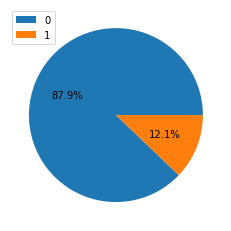

In [43]:
#зображення співвідношення об'єктів типів 0 і 1 на круговій діаграмі

plt.pie(data.type.value_counts(), autopct='%.1f%%')
plt.legend(loc = 'upper left', labels = [0, 1])
plt.show()

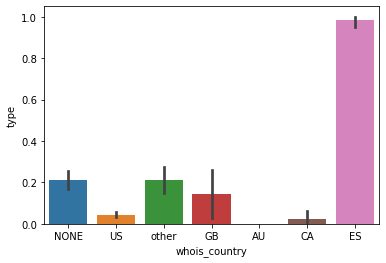

In [44]:
#зображення середнього значення type в залежності від країни у вигляді гістограми

plt.figure(figsize = (6,4))
sns.barplot(data = data , x = 'whois_country' , y = "type")
plt.show()

In [45]:
#зображення середнього значення type в залежності від url у вигляді таблиці

data[['url', "type"]].groupby(['url'], as_index=False).mean().sort_values(by='type', ascending=False).style.background_gradient(low=0.75,high=1)

,url,type
1,M_url,1.000000
0,B_url,0.000000


Можемо спостерігати цікаве явище під назвою "даталік", тобто цільова змінна повністю співпадає з якимось параметром, тому для подальшої "цікавості" роботи, дропнемо цю змінну

In [46]:
data = data.drop(['url'], axis = 1)

In [47]:
import pickle
pickle.dump(data, open('data.csv', 'wb'))

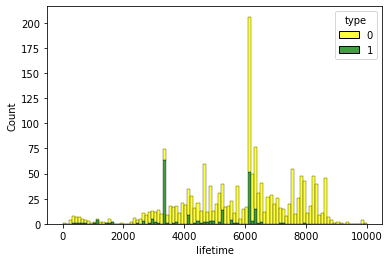

In [48]:
#розподіл об'єктів типів 0 і 1 на числовый прямій зі значеннями lifetime

plt.figure(figsize = (6,4))
sns.histplot(data = data , x = 'lifetime' , hue = "type",binwidth=100,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" )
plt.show()

## Побудова моделі

In [49]:
from sklearn.model_selection import train_test_split

Застосуємо one-hot-encoding для можливості побудови необхідного класифікатора. Також розіб'ємо на дані на тренувальний та тестовий набори у співвідношенні 7:3

In [50]:
data = pd.get_dummies(data)
X_dataset = data.drop(['type'], axis = 1)
y_dataset = data.type
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(X_dataset,
                                                                                    y_dataset,
                                                                                    test_size = 0.3,
                                                                                    random_state = 42,
                                                                                    stratify = y_dataset)

Побудуємо перший класифікатор з параметрами за замовчуванням, а саме max_depth - необмежено, min_samples_split = 2, min_samples_leaf = 1, max_features - необмежене, max_leaf_nodes - необмежене

In [51]:
import pickle
pickle.dump(data, open('da.csv', 'wb'))

In [52]:
from sklearn import tree

In [53]:
decision_tree_1 = tree.DecisionTreeClassifier(random_state = 42)

In [55]:
decision_tree_1.fit(X_train_dataset, y_train_dataset)

DecisionTreeClassifier(random_state=42)

In [56]:
y_pred_1 = decision_tree_1.predict(X_test_dataset)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
#точність алгоритму класифікації на тестових даних
accuracy_score(y_pred_1, y_test_dataset)

0.951310861423221

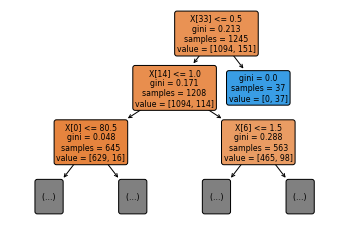

In [59]:
#графічне зображення частини дерева
tree.plot_tree(decision_tree_1, max_depth = 2, filled = True, rounded = True);

Порахуємо запропоновані метрики

In [65]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

In [64]:
print('precision_score : ', precision_score(decision_tree_1.predict(X_train_dataset), y_train_dataset))
print('recall_score    : ', recall_score(decision_tree_1.predict(X_train_dataset), y_train_dataset))
print('f1_score        : ', f1_score(decision_tree_1.predict(X_train_dataset), y_train_dataset))

precision_score :  1.0
recall_score    :  1.0
f1_score        :  1.0


In [65]:
print('precision_score : ', precision_score(y_pred_1, y_test_dataset))
print('recall_score    : ', recall_score(y_pred_1, y_test_dataset))
print('f1_score        : ', f1_score(y_pred_1, y_test_dataset))

precision_score :  0.8153846153846154
recall_score    :  0.7910447761194029
f1_score        :  0.803030303030303


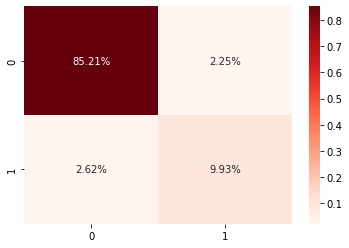

In [68]:
#графічне зображення confusion_matrix
sns.heatmap(confusion_matrix(y_pred_1, y_test_dataset)/np.sum(confusion_matrix(y_pred_1, y_test_dataset)),
            annot = True, fmt='.2%', cmap='Reds');

In [69]:
y_predicted_prob_dataset = decision_tree_1.predict_proba(X_test_dataset)

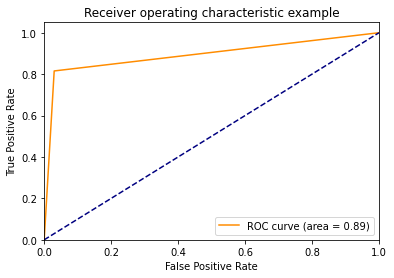

In [70]:
#roc_curve
fpr, tpr, thresholds = roc_curve(y_test_dataset, y_predicted_prob_dataset[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Хоч модель і має непогані показники, проте очевидне її перенавчання, через велику різницю в метриках на тренувальному та тестовому наборах

Спробуємо за допомогою випадкового пошуку підібрати кращі значення параметрах, які зменшать перенавчання

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#cітка параметрів
parameters = {'max_depth'       : range(4, 20, 2),
             'min_samples_split': range(2, 8),
             'min_samples_leaf' : range(1, 102, 5),
             'max_leaf_nodes'   : range(1, 20, 3),
             'max_features'     : range(1, 47, 5)}
best_clf_1 = tree.DecisionTreeClassifier(random_state = 42)
best_clf_1 = RandomizedSearchCV(best_clf_1, parameters, scoring='f1_weighted', random_state = 42)

In [74]:
best_clf_1.fit(X_train_dataset, y_train_dataset)

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.91 0.82 0.86  nan 0.88  nan 0.93 0.88 0.94 0.87]
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': range(4, 20, 2),
                                        'max_features': range(1, 47, 5),
                                        'max_leaf_nodes': range(1, 20, 3),
                                        'min_samples_leaf': range(1, 102, 5),
                                        'min_samples_split': range(2, 8)},
                   random_state=42, scoring='f1_weighted')

In [75]:
#найкращі отримані параметри
best_clf_1.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_leaf_nodes': 13,
 'max_features': 31,
 'max_depth': 12}

In [76]:
best_clf_1 = best_clf_1.best_estimator_

In [77]:
y_pred_1_best_clf = best_clf_1.predict(X_test_dataset)

In [78]:
#незначне покращення точності
accuracy_score(y_pred_1_best_clf, y_test_dataset)

0.9550561797752809

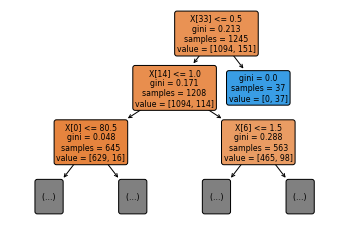

In [79]:
#графічне зображення
tree.plot_tree(best_clf_1, max_depth = 2, filled = True, rounded = True);

In [80]:
#метрики для тренувального набору
print('precision_score : ', precision_score(best_clf_1.predict(X_train_dataset), y_train_dataset))
print('recall_score    : ', recall_score(best_clf_1.predict(X_train_dataset), y_train_dataset))
print('f1_score        : ', f1_score(best_clf_1.predict(X_train_dataset), y_train_dataset))

precision_score :  0.7417218543046358
recall_score    :  0.9032258064516129
f1_score        :  0.8145454545454546


In [81]:
#метрики для тестового набору
print('precision_score : ', precision_score(y_pred_1_best_clf, y_test_dataset))
print('recall_score    : ', recall_score(y_pred_1_best_clf, y_test_dataset))
print('f1_score        : ', f1_score(y_pred_1_best_clf, y_test_dataset))

precision_score :  0.7692307692307693
recall_score    :  0.847457627118644
f1_score        :  0.8064516129032259


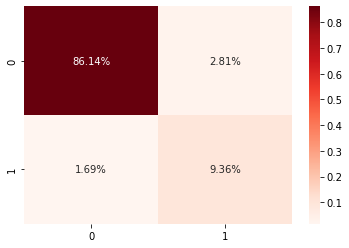

In [82]:
#графічне зображення confusion_matrix
sns.heatmap(confusion_matrix(y_pred_1_best_clf, y_test_dataset)/np.sum(confusion_matrix(y_pred_1_best_clf, y_test_dataset)),
            annot = True, fmt='.2%', cmap='Reds');

In [83]:
y_predicted_prob_dataset_best_Clf = best_clf_1.predict_proba(X_test_dataset)

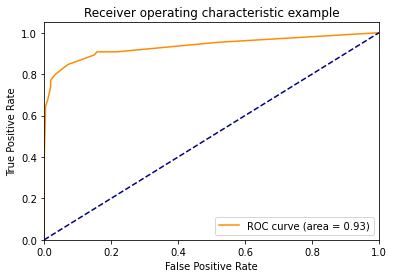

In [84]:
#roc_curve
fpr, tpr, thresholds = roc_curve(y_test_dataset, y_predicted_prob_dataset_best_Clf[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

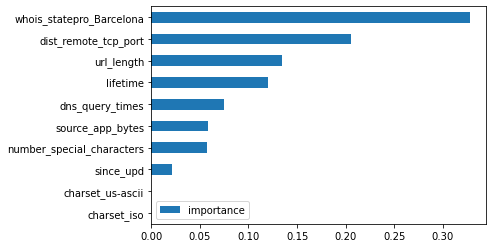

In [85]:
#гістограма, що показує важлливість кожного параметру при побудові дерева
imp = pd.DataFrame(best_clf_1.feature_importances_, index=X_dataset.columns, columns=['importance'])
imp.sort_values('importance')[-10:].plot(kind='barh');

Бачимо, що нам вдалося незначно покращити значення метрик, точність та помітно покращити roc_curve, при цьому значення метрик на тренувальному та тестових наборах вирівнялись, тому можна сказати, що ми зменшили схильність моделі як до недонавчання, так і до перенавчання

Перейдемо до роботи з масивом numpy

In [86]:
#формування масивів, розбиття на тестовий та тренувальні набори різних розмірів

X_array = np.random.randn(300, 2)
y_array = np.logical_xor(X_array[:, 0] > 0 , X_array[:, 1] > 0)

X_train_02, X_test_02, y_train_02, y_test_02 = train_test_split(X_array,
                                                                y_array,
                                                                test_size = 0.2,
                                                                random_state = 42,
                                                                stratify = y_array)

X_train_03, X_test_03, y_train_03, y_test_03 = train_test_split(X_array,
                                                                y_array,
                                                                test_size = 0.3,
                                                                random_state = 42,
                                                                stratify = y_array)

X_train_04, X_test_04, y_train_04, y_test_04 = train_test_split(X_array,
                                                                y_array,
                                                                test_size = 0.4,
                                                                random_state = 42,
                                                                stratify = y_array)

X_train_05, X_test_05, y_train_05, y_test_05 = train_test_split(X_array,
                                                                y_array,
                                                                test_size = 0.5,
                                                                random_state = 42,
                                                                stratify = y_array)

Визначимо, який розмір дає найкращі числові метрики, і продовжемо роботу вже з ним

In [87]:
decision_tree_2 = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_2.fit(X_train_02, y_train_02)
y_pred_2 = decision_tree_2.predict(X_test_02)
print('accuracy_score  : ', accuracy_score(y_pred_2, y_test_02))
print('precision_score : ', precision_score(y_pred_2, y_test_02))
print('recall_score    : ', recall_score(y_pred_2, y_test_02))
print('f1_score        : ', f1_score(y_pred_2, y_test_02))

accuracy_score  :  0.9333333333333333
precision_score :  0.9333333333333333
recall_score    :  0.9333333333333333
f1_score        :  0.9333333333333333


In [88]:
decision_tree_3 = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_3.fit(X_train_03, y_train_03)
y_pred_3 = decision_tree_3.predict(X_test_03)
print('accuracy_score  : ', accuracy_score(y_pred_3, y_test_03))
print('precision_score : ', precision_score(y_pred_3, y_test_03))
print('recall_score    : ', recall_score(y_pred_3, y_test_03))
print('f1_score        : ', f1_score(y_pred_3, y_test_03))

accuracy_score  :  0.9777777777777777
precision_score :  0.9545454545454546
recall_score    :  1.0
f1_score        :  0.9767441860465117


In [89]:
decision_tree_4 = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_4.fit(X_train_04, y_train_04)
y_pred_4 = decision_tree_4.predict(X_test_04)
print('accuracy_score  : ', accuracy_score(y_pred_4, y_test_04))
print('precision_score : ', precision_score(y_pred_4, y_test_04))
print('recall_score    : ', recall_score(y_pred_4, y_test_04))
print('f1_score        : ', f1_score(y_pred_4, y_test_04))

accuracy_score  :  0.9833333333333333
precision_score :  0.9661016949152542
recall_score    :  1.0
f1_score        :  0.9827586206896551


In [90]:
decision_tree_5 = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_5.fit(X_train_05, y_train_05)
y_pred_5 = decision_tree_5.predict(X_test_05)
print('accuracy_score  : ', accuracy_score(y_pred_5, y_test_05))
print('precision_score : ', precision_score(y_pred_5, y_test_05))
print('recall_score    : ', recall_score(y_pred_5, y_test_05))
print('f1_score        : ', f1_score(y_pred_5, y_test_05))

accuracy_score  :  0.9733333333333334
precision_score :  0.972972972972973
recall_score    :  0.972972972972973
f1_score        :  0.972972972972973


Бачимо, що найкращі метрики при відношенні тренувального та тестового наборів як 3:2
Перевіримо, чи присутнє перенавчання

In [91]:
print('precision_score : ', precision_score(decision_tree_4.predict(X_train_04), y_train_04))
print('recall_score    : ', recall_score(decision_tree_4.predict(X_train_04), y_train_04))
print('f1_score        : ', f1_score(decision_tree_4.predict(X_train_04), y_train_04))

precision_score :  1.0
recall_score    :  1.0
f1_score        :  1.0


Помічаємо незначне перенавчання. Спробуємо покращити нашу модель за допомогою решітчатого пошуку

In [94]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {'max_depth'       : range(2, 11, 2),
             'min_samples_split': range(2, 9, 3),
             'min_samples_leaf' : range(1, 10, 4),
             'max_leaf_nodes'   : range(1, 42, 10),
             'max_features'     : range(1, 5)}
best_clf_2 = tree.DecisionTreeClassifier(random_state = 42)
best_clf_2 = GridSearchCV(best_clf_2, parameters, scoring='f1_weighted')

In [98]:
best_clf_2.fit(X_train_04, y_train_04)

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\shink\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(2, 11, 2),
                         'max_features': range(1, 5),
                         'max_leaf_nodes': range(1, 42, 10),
                         'min_samples_leaf': range(1, 10, 4),
                         'min_samples_split': range(2, 9, 3)},
             scoring='f1_weighted')

In [99]:
#найкращі параметри
best_clf_2.best_params_

{'max_depth': 6,
 'max_features': 2,
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [100]:
best_clf_2 = best_clf_2.best_estimator_

In [105]:
y_pred_2_best_clf = best_clf_2.predict(X_test_04)

In [108]:
accuracy_score(y_pred_2_best_clf, y_test_04)

0.9833333333333333

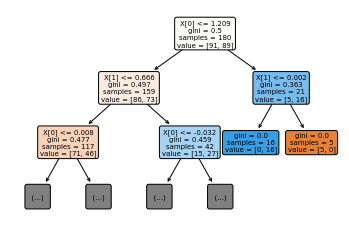

In [109]:
#графічне зображення
tree.plot_tree(best_clf_2, max_depth = 2, filled = True, rounded = True);

In [110]:
print('precision_score : ', precision_score(y_pred_2_best_clf, y_test_04))
print('recall_score    : ', recall_score(y_pred_2_best_clf, y_test_04))
print('f1_score        : ', f1_score(y_pred_2_best_clf, y_test_04))

precision_score :  0.9661016949152542
recall_score    :  1.0
f1_score        :  0.9827586206896551


Бачимо, що метрики не змінилися. Зобразімо confusion_matrix і roc_curve

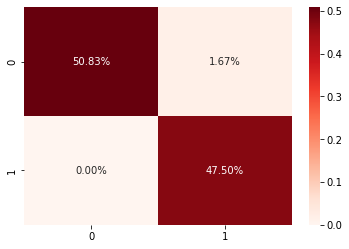

In [111]:
sns.heatmap(confusion_matrix(y_pred_2_best_clf, y_test_04)/np.sum(confusion_matrix(y_pred_2_best_clf, y_test_04)),
            annot = True, fmt='.2%', cmap='Reds');

In [112]:
y_predicted_prob_array_best_Clf = best_clf_2.predict_proba(X_test_04)

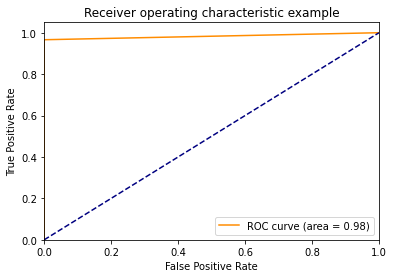

In [113]:
fpr, tpr, thresholds = roc_curve(y_test_04, y_predicted_prob_array_best_Clf[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Висновки

У ході виконання лабораторної роботи №2 було побудовано дві моделі класифікації, використовуючи sklearn.tree.DecisionTreeClassifier на двох датасетах, перший з яких був сильно змінений під час преобробки даних. Загалом було проведено графічне зображення даних, розбиття на тестовий та тренувальний набори, побудова моделей, обчислення їх метрик, покращення моделей задля запобігання перенавчанню за допомогою випадкового та решітчатого пошуку, візуалізація моделей тощо. Також було обчислено метрики моделей в залежності від розміру тестового набору, було проаналізовано їх зміну. При роботі з першим датасетом було помічене цікаве явище - "даталік". Загалом уважаю що мета роботи "побудова та оцiнювання якостi моделей дерев рiшень для класифiкацiї  засобами бiблiотеки Scikit-Learn Python" є виконаною